In [1]:
%load_ext autoreload
%autoreload 2

from mtcnn import MTCNN
from faceEngine import FaceEngine
from pathlib import Path
from PIL import Image, ImageDraw
import cv2
import numpy as np
import os
import time
import torch


In [2]:
mtcnn = MTCNN()
faceEngine = FaceEngine()

In [3]:
def showBboxes(img, bounding_boxes, facial_landmarks=[]):
    """Draw bounding boxes and facial landmarks.

    Arguments:
        img: an instance of PIL.Image.
        bounding_boxes: a float numpy array of shape [n, 5].
        facial_landmarks: a float numpy array of shape [n, 10].

    Returns:
        an instance of PIL.Image.
    """

    img_copy = img.copy()
    draw = ImageDraw.Draw(img_copy)

    for b in bounding_boxes:
        draw.rectangle([
            (b[0], b[1]), (b[2], b[3])
        ], outline='white')

    for p in facial_landmarks:
        for i in range(5):
            draw.ellipse([
                (p[i] - 1.0, p[i + 5] - 1.0),
                (p[i] + 1.0, p[i + 5] + 1.0)
            ], outline='red')

    return img_copy

def getBlurScore(image):
    # compute the Laplacian of the image and then return the focus
    # measure, which is simply the variance of the Laplacian	
    # remove noise by blurring with a Gaussian filter
    imageBlur = cv2.GaussianBlur(image, (3,3), 0)
    imageGray = cv2.cvtColor(imageBlur, cv2.COLOR_BGR2GRAY)
    return cv2.Laplacian(imageGray, cv2.CV_64F).var()

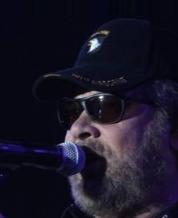

In [4]:
#file = './data/facebank/dataset/045882.jpg'
file = './data/facebank/dataset/047835.jpg'
img = Image.open(file)
img

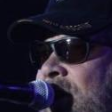

In [5]:
bbox, face, landmark = mtcnn.align_largest_bbox(
            img,
            65, 
            thresholds=[0.80, 0.95, 0.99])
face

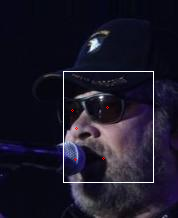

In [6]:
showBboxes(img, [bbox], [landmark])

In [7]:
cv_face = np.array(face)
blur_score = getBlurScore(cv_face[:, :, ::-1].copy())
blur_score

67.65714051335219

In [8]:
landmark

array([ 72.92124 , 107.96678 ,  76.505486,  75.86177 , 103.524734,
       110.29844 , 107.88631 , 128.9605  , 159.11563 , 158.23451 ],
      dtype=float32)

In [9]:
facial5points = [[landmark[j],landmark[j+5]] for j in range(5)]
eye1_nose_x = facial5points[2][0]-facial5points[0][0] 
eye2_nose_x = facial5points[1][0]-facial5points[2][0]  
mouth1_nose_x = facial5points[2][0]-facial5points[3][0]
mouth2_nose_x = facial5points[4][0]-facial5points[2][0]
facial5points

[[72.92124, 110.29844],
 [107.96678, 107.88631],
 [76.505486, 128.9605],
 [75.86177, 159.11563],
 [103.524734, 158.23451]]

In [10]:
eye1_nose_x

3.5842438

In [11]:
eye_distance = facial5points[1][0] - facial5points[0][0]
eye_distance

35.04554